In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv(r'C:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Giorno 19 29-04\esercitazione_house\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
df["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

EDA

In [73]:
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [74]:
# Conversione data in datetime
df['date'] = df['date'].str.replace('T000000', '', regex=False)


In [75]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

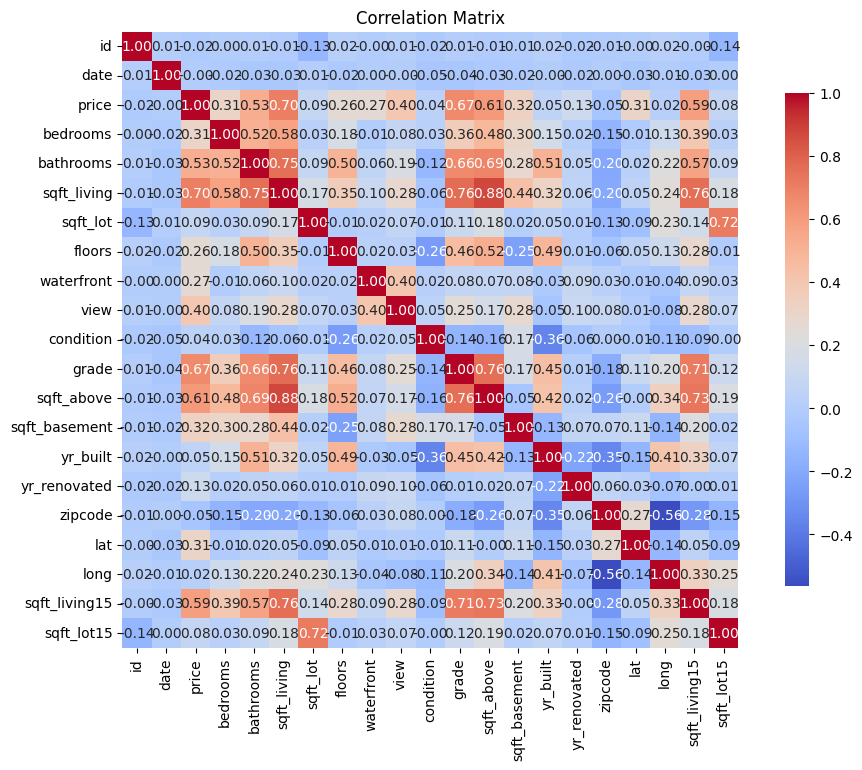

In [76]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()


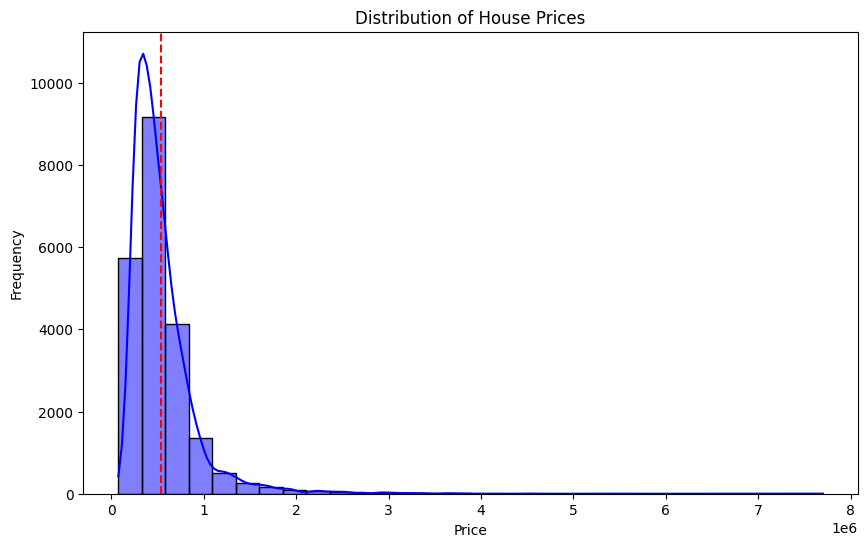

np.float64(540088.1417665294)

In [77]:
# Visualizzazione della distribuzione del prezzo delle case
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.axvline(df["price"].mean(), color="red", linestyle="--", label="Mean Price")
plt.show()
df["price"].mean()

C:\Users\fabri\AppData\Local\Temp\ipykernel_10828\199833474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedrooms", y="price", data=df, palette="Set2")


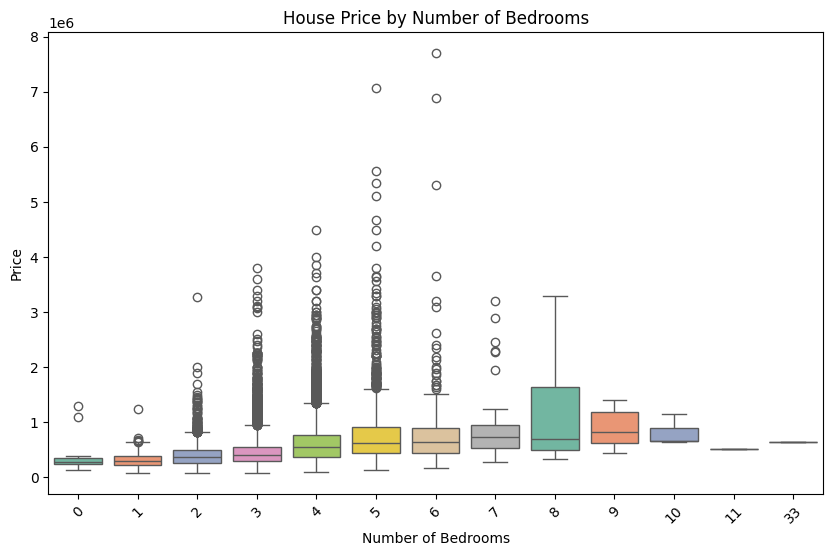

In [78]:
# Visualizzazione prezzo in base alle bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x="bedrooms", y="price", data=df, palette="Set2")
plt.title("House Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

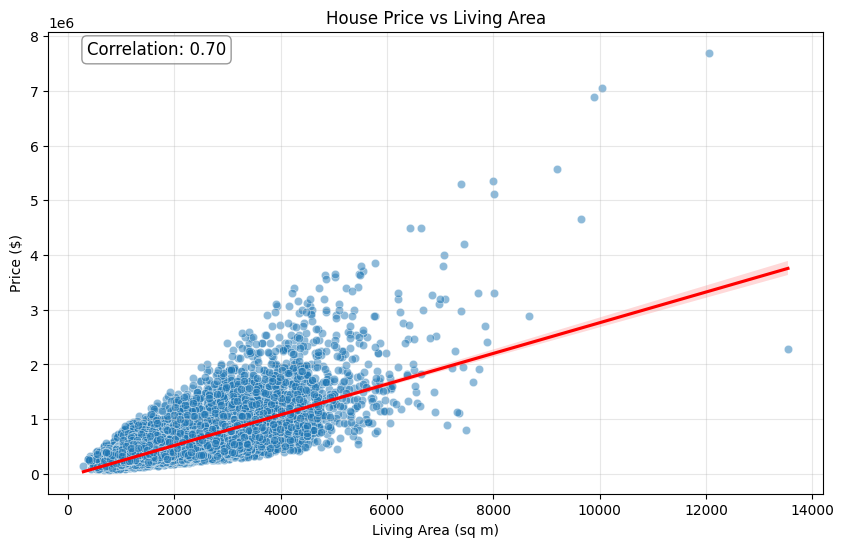

In [48]:
# scatter

In [79]:
# Sostituzione dei valori di yr_renovated
df['yr_renovated'] = pd.cut(df['yr_renovated'], bins=[-1, 0, 1980, 2000, float('inf')], labels=[0, 1, 2, 3])

# Visualizza le prime righe per verificare la sostituzione
df['yr_renovated'].head()

0    0
1    2
2    0
3    0
4    0
Name: yr_renovated, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [80]:
X = df.drop(columns=["price", "id", "date", "lat", "long", "zipcode"])
y = df["price"]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from math import sqrt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")


R^2: 0.6544943330075725
RMSE: 0.6225346442506131


In [91]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# --- 1) Prepara DataFrame per indicizzazione per nome di colonna --- #
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test,  columns=X.columns)

# y_train e y_test devono esistere come array o Serie

# --- 2) Imposta parametri iniziali --- #
vif_max = 10
X_copy = X.copy()

# Calcola R2 di base con tutte le feature correnti
model = LinearRegression()
model.fit(X_train.loc[:, X_copy.columns], y_train)
baseline_r2 = model.score(X_test.loc[:, X_copy.columns], y_test)
print(f"R² iniziale con tutte le feature: {baseline_r2:.4f}\n")

# --- 3) Loop di rimozione condizionata sull’R² --- #
while True:
    # 3.1 Calcolo VIF per tutte le colonne
    vif_temp = pd.DataFrame({
        "Feature": X_copy.columns,
        "VIF": [
            variance_inflation_factor(X_copy.values, i)
            for i in range(X_copy.shape[1])
        ]
    }).sort_values("VIF", ascending=False)
    
    # Prendo la feature con VIF più alto
    feat    = vif_temp["Feature"].iloc[0]
    max_vif = vif_temp["VIF"].iloc[0]
    
    # Se nessuna supera la soglia, esco
    if max_vif <= vif_max:
        print("Tutte le feature hanno VIF ≤ soglia. Stop.\n")
        break
    
    # 3.2 Provo a rimuovere temporaneamente 'feat'
    cols_temp = X_copy.columns.drop(feat)
    model_temp = LinearRegression()
    model_temp.fit(X_train.loc[:, cols_temp], y_train)
    new_r2 = model_temp.score(X_test.loc[:, cols_temp], y_test)
    
    print(f"VIF massimo: {max_vif:.2f} → candidato: '{feat}'")
    print(f"R² senza '{feat}': {new_r2:.4f}  (vs {baseline_r2:.4f})")
    
    # 3.3 Decisione: rimuovo solo se R2 >= baseline
    if new_r2 >= baseline_r2:
        print(f"→ Rimuovo '{feat}' (R² non peggiora)\n")
        X_copy = X_copy.drop(columns=[feat])
        baseline_r2 = new_r2  # aggiorno baseline
    else:
        print(f"→ Mantengo '{feat}' (R² peggiora). Stop.\n")
        break

print("Feature finali selezionate:", X_copy.columns.tolist())

# --- 4) Costruisci train/test definitivi --- #
X_train_vif = X_train.loc[:, X_copy.columns]
X_test_vif  = X_test.loc[:,  X_copy.columns]

print(f"\nModello finale: {X_copy.shape[1]} feature, R² finale = {baseline_r2:.4f}")


R² iniziale con tutte le feature: 0.6545



c:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF massimo: inf → candidato: 'sqft_living'
R² senza 'sqft_living': 0.6545  (vs 0.6545)
→ Rimuovo 'sqft_living' (R² non peggiora)

VIF massimo: 139.78 → candidato: 'grade'
R² senza 'grade': 0.6101  (vs 0.6545)
→ Mantengo 'grade' (R² peggiora). Stop.

Feature finali selezionate: ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

Modello finale: 14 feature, R² finale = 0.6545


In [92]:
model.fit(X_train_vif, y_train)
y_pred = model.predict(X_test_vif)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

R^2: 0.6544943330075725
RMSE: 0.6225346442506131


In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


lasso_cv    = LassoCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0], cv=5, random_state=0)
ridge_cv    = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0], cv=5)
elastic_cv  = ElasticNetCV(
    alphas=[0.1, 0.5, 1.0, 5.0, 10.0],
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
    cv=5,
    random_state=0
)

# Fit sui dati filtrati dal VIF
lasso_cv.fit(X_train_vif, y_train)
ridge_cv.fit(X_train_vif, y_train)
elastic_cv.fit(X_train_vif, y_train)

print(f"Best alpha per Lasso:      {lasso_cv.alpha_:.4f}")
print(f"Best alpha per Ridge:      {ridge_cv.alpha_:.4f}")
print(f"Best alpha per ElasticNet: {elastic_cv.alpha_:.4f}")
print(f"Best l1_ratio (ElasticNet):{elastic_cv.l1_ratio_:.4f}")

# --- 2) Addestra i modelli definitivi con i parametri scelti --- #
lasso   = Lasso(alpha=lasso_cv.alpha_, random_state=0)
ridge   = Ridge(alpha=ridge_cv.alpha_)
elastic = ElasticNet(alpha=elastic_cv.alpha_, l1_ratio=elastic_cv.l1_ratio_, random_state=0)

lasso.fit(X_train_vif, y_train)
ridge.fit(X_train_vif, y_train)
elastic.fit(X_train_vif, y_train)

# --- 3) Predizione sul set di test filtrato --- #
y_pred_lasso   = lasso.predict(X_test_vif)
y_pred_ridge   = ridge.predict(X_test_vif)
y_pred_elastic = elastic.predict(X_test_vif)

# --- 4) Metriche di valutazione --- #
r2_lasso    = r2_score(y_test, y_pred_lasso)
r2_ridge    = r2_score(y_test, y_pred_ridge)
r2_elastic  = r2_score(y_test, y_pred_elastic)

rmse_lasso    = sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge    = sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_elastic  = sqrt(mean_squared_error(y_test, y_pred_elastic))

print("\nConfronto modelli su test set:")
print("=" * 40)
print(f"Lasso     → R²: {r2_lasso:.4f}, RMSE: {rmse_lasso:.4f}")
print(f"Ridge     → R²: {r2_ridge:.4f}, RMSE: {rmse_ridge:.4f}")
print(f"ElasticNet→ R²: {r2_elastic:.4f}, RMSE: {rmse_elastic:.4f}")


c:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha per Lasso:      0.1000
Best alpha per Ridge:      10.0000
Best alpha per ElasticNet: 0.1000
Best l1_ratio (ElasticNet):0.1000

Confronto modelli su test set:
Lasso     → R²: 0.5879, RMSE: 0.6799
Ridge     → R²: 0.6545, RMSE: 0.6225
ElasticNet→ R²: 0.6439, RMSE: 0.6320


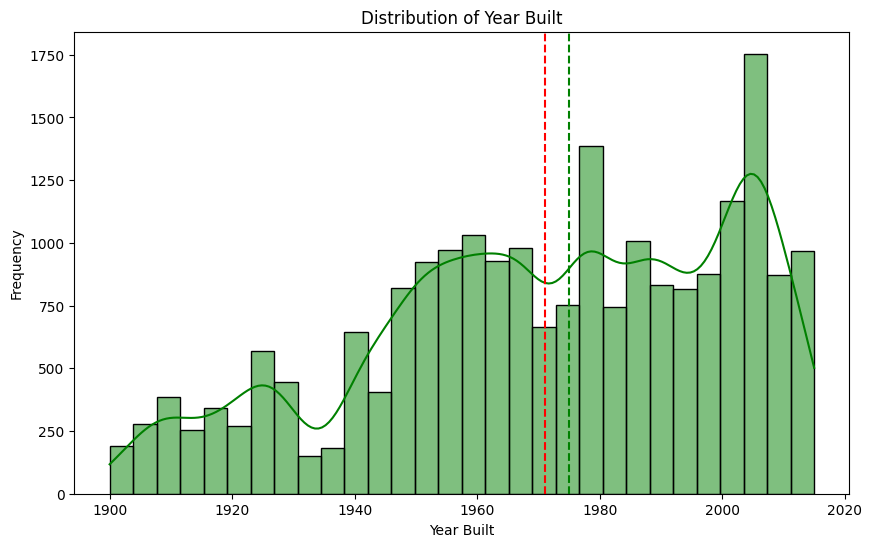

In [14]:
# Distribuzione dell'anno di costruzione
plt.figure(figsize=(10, 6))
sns.histplot(df["yr_built"], bins=30, kde=True, color="green")
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.axvline(df["yr_built"].mean(), color="red", linestyle="--", label="Mean Year Built")
plt.axvline(df["yr_built"].median(), color="green", linestyle="--", label="Mean Year Built")
plt.show()

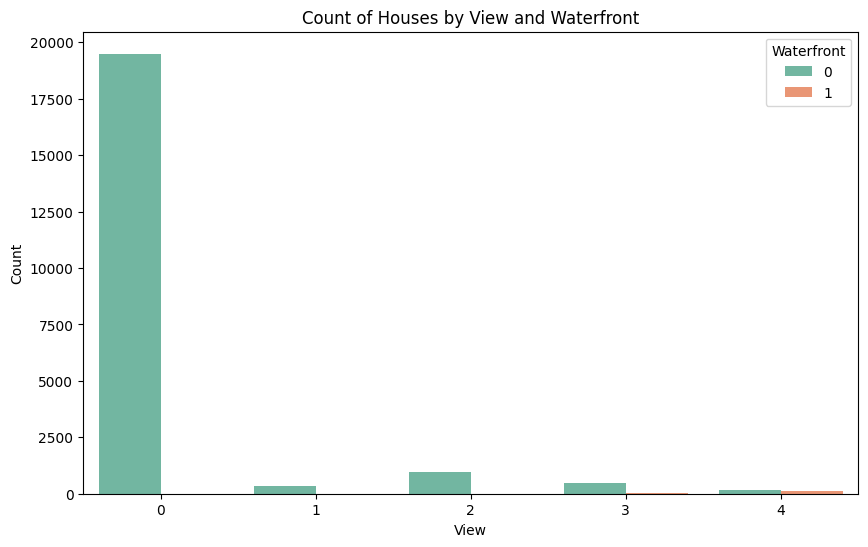

In [15]:
# Correlazione tra view e waterfront
plt.figure(figsize=(10, 6))
sns.countplot(x="view", hue="waterfront", data=df, palette="Set2")
plt.title("Count of Houses by View and Waterfront")
plt.xlabel("View")
plt.ylabel("Count")
plt.legend(title="Waterfront", loc="upper right")
plt.show()

C:\Users\fabri\AppData\Local\Temp\ipykernel_10828\586734520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="view", y="price", data=df, palette="Set2")


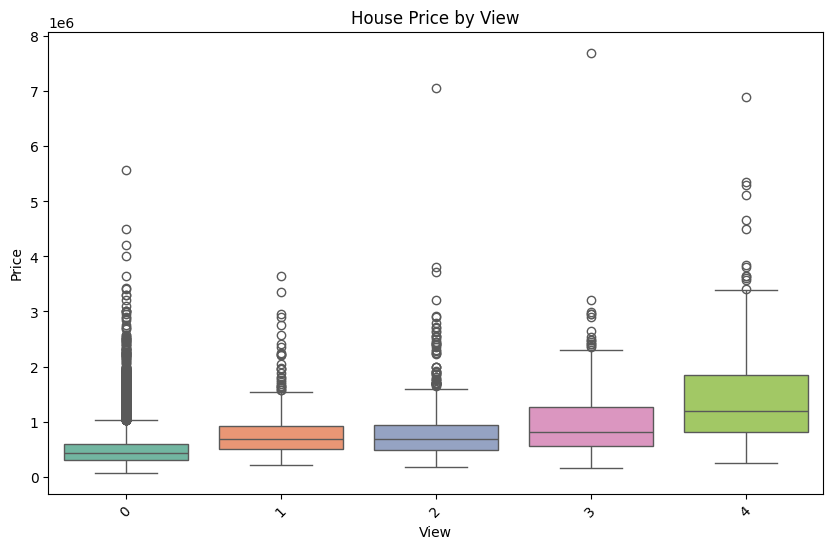

In [16]:
# Vediamo quanto costano le case in base alla vista
plt.figure(figsize=(10, 6))
sns.boxplot(x="view", y="price", data=df, palette="Set2")
plt.title("House Price by View")
plt.xlabel("View")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Sostituzione dei valori di yr_renovated
df['yr_renovated'] = pd.cut(df['yr_renovated'], bins=[-1, 0, 1980, 2000, float('inf')], labels=[0, 1, 2, 3])

# Visualizza le prime righe per verificare la sostituzione
df['yr_renovated'].head()

0    0
1    2
2    0
3    0
4    0
Name: yr_renovated, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,6414100192,2014-12-09,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,7,201.59951,37.16120,1951,2,98125,47.7210,-122.319,157.00607,709.686017
2,5631500400,2015-02-25,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,2487200875,2014-12-09,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,1954400510,2015-02-18,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,142.14159,105.073293,3.0,0,0,...,8,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627
21609,6600060120,2015-02-23,400000.0,4,2.50,214.60593,540.045139,2.0,0,0,...,8,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600
21610,1523300141,2014-06-23,402101.0,2,0.75,94.76106,125.419050,2.0,0,0,...,7,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321
21611,291310100,2015-01-16,400000.0,3,2.50,148.64480,221.852364,2.0,0,0,...,8,148.64480,0.00000,2004,0,98027,47.5345,-122.069,130.99323,119.566161


In [24]:
X = df.drop(columns=["price", "id", "date", "lat", "long", "zipcode"])
y = df["price"]

In [25]:
from sklearn.linear_model import LinearRegression

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_test)
y_pred_scaled = model.predict(X_test_scaled)
 

c:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [26]:
# calcolo r^2 e RMSE
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

R^2: -2.000149489529733
RMSE: 673463.240352576


In [28]:
model.fit(X_train_vif, y_train)
y_pred_vif = model.predict(X_test_scaled)
r2_vif = r2_score(y_test, y_pred_vif)
rmse_vif = sqrt(mean_squared_error(y_test, y_pred_vif))
print(f"R^2 with VIF: {r2_vif}")
print(f"RMSE with VIF: {rmse_vif}")

R^2 with VIF: 0.03629481099683807
RMSE with VIF: 381693.30889913515


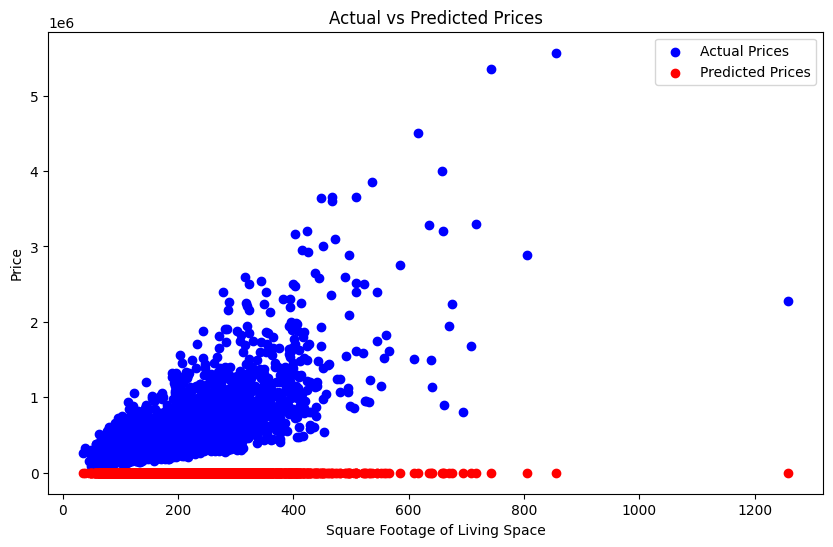

In [30]:
# Distribuzione totale
plt.figure(figsize=(10, 6))
plt.scatter(X_test["sqft_living"], y_test, color="blue", label="Actual Prices")
plt.scatter(X_test["sqft_living"], y_pred, color="red", label="Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Price")
plt.legend()
plt.show()